# Straight-line Fit

**Name**: ZHU GUANGYU  
**Student ID**: 20165953  
**Github Repo**: [assignment06](https://github.com/z1ggy-o/cv_assignment/tree/master/assignment06)  

---

## Least Squares Problem

Suppose we have a tall matrix A, so $Ax = b$ is *over-determined*. For most b, there is no $x$ that satisfies $Ax = b$.

The *least squares problem* is: choosing $x$ to minimize $||Ax-b||^2$.  
We call the solution *least squares approxmimata solution* of $Ax=b$, and notate it as $\hat{x}$.

## Least squares data fitting

If we have a scalar $y$ and an $n$-vector $x$ that are related by model：
$$y \approx f(x)$$

$x$ is the *independent variable*,  
$y$ is the *outcome*,  
$f: R^{n} \rightarrow R$ gives the relation between $x$ and $y$.

Often $x$ is a feature vector, and $y$ is something we want to predict.  
We do not know the true relationship $f$ between $x$ and $y$. So what we want to do is to find a *approximation* of $f$.

We define a  *linear in the parameters* model:
$$\hat{f}(x) = \theta_{1}f_{1}(x)+ \cdots + \theta_{p}f_{p}(x)$$

$f_{i}: R^{n} \rightarrow R$: are *basis fuctions* that we choose.  
$\theta_{i}$: are *model parameters* that we choose.  
$\hat{y}^{(i)} = \hat{f}(x^{(i)})$ is prediction of $y^(i)$.

Thus, our goal becomes to choose model parameters $\theta_{i}$ to minimize *residuals* $r^{i} = y^{(i)} - \hat{y}^{(i)}$. This can be formulated and solved as a **least squares problem**.

If we define  
$y^{d} = (y^{(1)},\cdots,y^{(N)})$ is vecor of outcomes,  
$\hat{y}^{d} = (\hat{y}^{(1)},\cdots,\hat{y}^{(N)})$ is vector of predictions,  
$r^{d} = (r^{(1)},\cdots,r^{(N)})$ is vector of residuals.

have $N\times p$ matrix $A$ with elements $A_{ij} = f{j}(x^{(i)})$, so $\hat{y}^{d} = A\theta$.  
$||r^{d}||^2 = ||y^{d} - \hat{y}^{d}||^2 = ||y^{d} - A\theta||^2$

## Straight-line Fit

Use straight-line to fit the data set, we know general line relation $f(x) = ax + b$.

Since the *linear in the parameters model* is
$$\hat{f}(x) = \theta_{1}f_{1}(x)+ \cdots + \theta_{p}f_{p}(x)$$

Here, we have $p=2$ with $f_{1}(x) = 1$, $f_{2}(x) = x$.  
Model becomes to $\hat{f}(x) = \theta_{1} + \theta_{2}x$ which matches general line relation.

---

Let's try a exercise.

### First, generate some random numbers as *outcomes*.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

num     = 201
std     = 20
a       = 2 
b       = 10

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 
# y = f(x) = a * x + b

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-100,100,num)
y1      = a * x + nn * std + b 
y2      = a * x + b

### Second, set model

As we said above, we have model $\hat{f}(x) = \theta_{1} + \theta_{2}x$. Change it to matrix form, we have
$$\hat{f}(x) = A\theta$$

which, $A =
\begin{bmatrix}
    1 & x^{(1)} \\
    \vdots & \vdots \\
    1 & x^{(N)}
\end{bmatrix}$, 
$\theta = \begin{bmatrix}
\theta_{1} \\
\theta_{2}
\end{bmatrix}$

In [15]:
A = np.vstack([np.ones(len(x)), x]).T

### Third, define object funtion

By *least square* problem, we have object function $||r^{d}||^2 = ||y^{d} - \hat{y}^{d}||^2 = ||y^{d} - A\theta||^2$

In [51]:
def computeCost(A, outcome, theta):
    inner = np.power((outcome - (np.inner(A, theta))), 2)
    return np.sum(inner)

### Fourth, compute solution $\theta$

To compute $\theta$ we have two method.

1. Use derivative
2. Use inverse matrix

Here we use inverse matrix to get $\theta$, have $\hat{\theta} = (A^{T}A)^{-1}A^{T}y^{d}$

Bring our $A$ into formular, we have  
Gram matrix $A^{T}A = \begin{bmatrix}
N & 1^{T}x^{d} \\
1^{T}x^{d} & (x^{d})^{T}x^{d}
\end{bmatrix}$

so, $(A^{T}A)^{-1} = \frac{1}{N(x^{d})^{T}x^{d}-(1^{T}x^{d})^{2}}$
$\begin{bmatrix}
(x^{d})^{T}x^{d} & -1^{T}x^{d} \\
-1^{T}x^{d} & N
\end{bmatrix}$

$A^{T}y = \begin{bmatrix}
1^{T}y^{d} \\
(x^{d})^{T}y^{d}
\end{bmatrix}$

Multiplying the scalar term by $N^{2}$, and dividing the matrix and vector terms by $N$, we can change the expression to
$$\frac{1}{rms(x^{d})^{2} - avg(x^{d})^{2}}
\begin{bmatrix} rms(x^{d})^{2} & -avg(x^{d}) \\ -avg(x^{d}) & 1\end{bmatrix}
\begin{bmatrix}avg(y^{d}) \\ (x^{d})^{T}y^{d}/N\end{bmatrix}$$

Change them into more simply terms, we have  
$\hat{\theta}_{2} = \frac{std(y_{d})}{std(x^{d})}\rho$, $\hat{\theta}_{1} = avg(y^{d})-\hat{\theta}_{2}avg(x^{d})$

where, $\rho = \frac{(x^{d}-avg(x^{d})1)^{T}(y^{d}-avg(y^{d})1)}{N std(x^{d})std(y^{d})}$

Finaly, we get the approximate $\hat{f}(x) = avg(y^{d}) + \rho\frac{std(y^{d})}{std(x^{d})}(x-avg(x^{d}))$

In [30]:
def rho(var, outcome):
    # function for computing rho in formular
    
    numerator = (np.inner((var - np.full(len(var), np.average(var))).T,
                          (outcome - np.full(len(outcome),
                                             np.average(outcome)))))

    denominator = len(var) * np.std(var) * np.std(outcome)
    
    return numerator/denominator


# trans list to numpy array
y = np.array(y1)

y_avg = np.average(y)
ce = rho(x, y) * np.std(y) / np.std(x)
x_avg = np.average(x)

# final result
f_x = y_avg + ce*(x - x_avg)

### Plot result

Let's plot the result to see if the result matches well.

#### Nosiy data

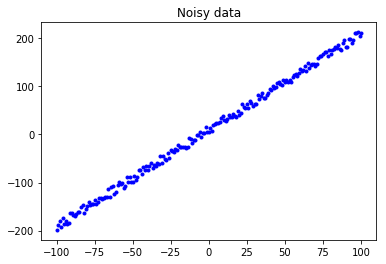

In [26]:
plt.title("Noisy data")
plt.plot(x, y1, 'b.')
plt.show()

#### Clean data

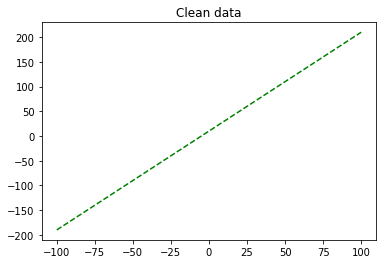

In [27]:
plt.title("Clean data")
plt.plot(x, y2, 'g--')
plt.show()

#### Approximate line

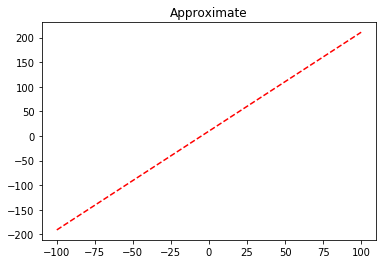

In [29]:
plt.title("Approximate")
plt.plot(x, f_x, 'r--')
plt.show()

#### Put noisy data with clean data and fitting line

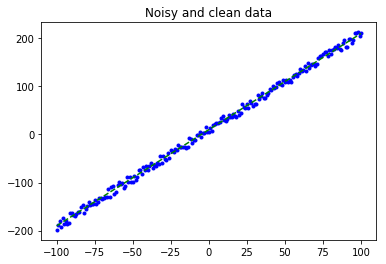

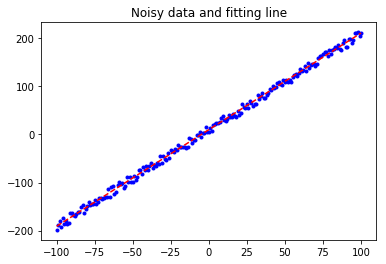

In [34]:
plt.title("Noisy and clean data")
plt.plot(x, y1, 'b.', x, y2, 'g--')
plt.show()

plt.title("Noisy data and fitting line")
plt.plot(x, y1, 'b.', x, f_x, 'r--')
plt.show()

From above graph we can see, our approximate result is similar with the clean data.

---

Because `numpy` already have a function for computing *least-squares problem* to a linear matrix--`numpy.linalg.lstsq`, we actually do not need to build our own one.

Let try `linalg.lstsq`

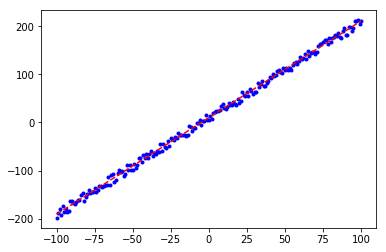

In [35]:
the1, the2 = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y1, 'b.', x, the1+the2*x, 'r--')
plt.show()

The result is almost same as our formular.

If we compute the compare the square deviation, have

In [53]:
theta_2 = rho(x, y) * np.std(y) / np.std(x)
theta_1 = np.average(y) - theta_2*np.average(x)
theta = np.array([theta_1, theta_2])

cost_our = computeCost(A, y, theta)
cost_np = computeCost(A, y, np.array([the1, the2]))

print("Our formula cost:", cost_our)
print("Numpy formula cost:", cost_np)

Our formula cost: 6477.384723477494
Numpy formula cost: 6477.384723477492
